In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Census.csv')

In [3]:
print(df.describe())

          Person ID  Family Composition  Population Base            Sex  \
count  5.697400e+05        569740.00000    569740.000000  569740.000000   
mean   7.679353e+06             2.01187         1.018731       1.507551   
std    1.644699e+05             2.35879         0.159058       0.499943   
min    7.394483e+06            -9.00000         1.000000       1.000000   
25%    7.536918e+06             2.00000         1.000000       1.000000   
50%    7.679352e+06             2.00000         1.000000       2.000000   
75%    7.821787e+06             3.00000         1.000000       2.000000   
max    7.964223e+06             6.00000         3.000000       2.000000   

                 Age  Marital Status        Student  Country of Birth  \
count  569740.000000   569740.000000  569740.000000     569740.000000   
mean        3.978676        1.856201       1.777904          1.016237   
std         2.219494        1.125021       0.415656          1.153095   
min         1.000000        1.00

<Axes: xlabel='Age Group'>

<Figure size 1200x800 with 0 Axes>

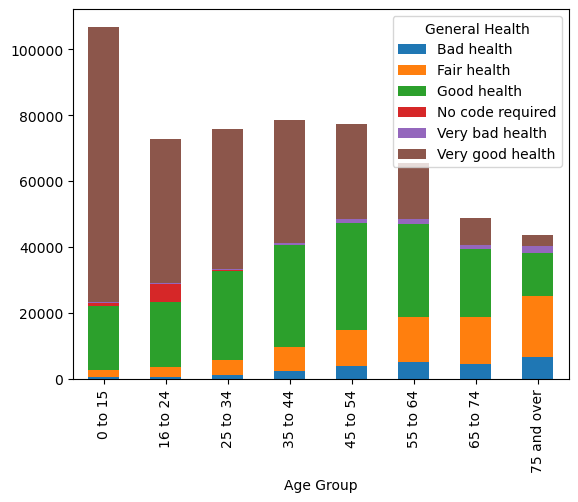

In [11]:
#Replacing numerical values with categorical values
age_groups = {
    6: '55 to 64',
    1: '0 to 15',
    7: '65 to 74',
    2: '16 to 24',
    8: '75 and over',
    5: '45 to 54',    
    4: '35 to 44',
    3: '25 to 34'       
}
df['Age Group'] = df['Age'].replace(age_groups)

general_health = {
    2: 'Good health',
    1: 'Very good health',
    3: 'Fair health',
    4: 'Bad health',
    5: 'Very bad health',
    -9: 'No code required'
    
}

df['General Health'] = df['Health'].replace(general_health)

# Plot the groupby bar graph
plt.figure(figsize=(12, 8))
group=df.groupby(['Age Group','General Health']).size().unstack()
group.plot(kind='bar',stacked=True)

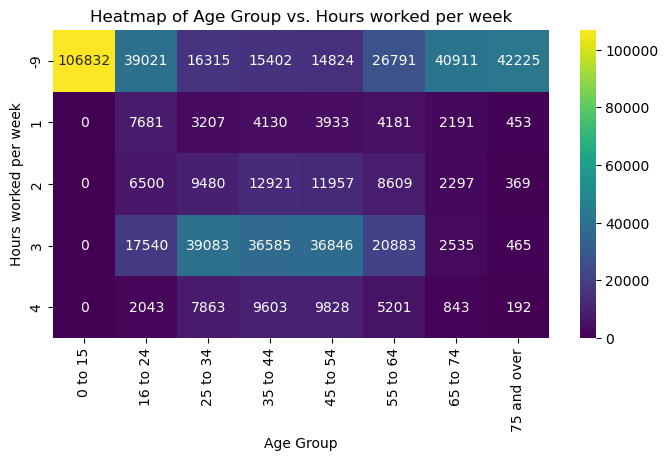

In [5]:

# Create a pivot table to aggregate data
heatmap_data = df.pivot_table(columns='Age Group', index='Hours worked per week', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')
plt.title('Heatmap of Age Group vs. Hours worked per week')
plt.show()



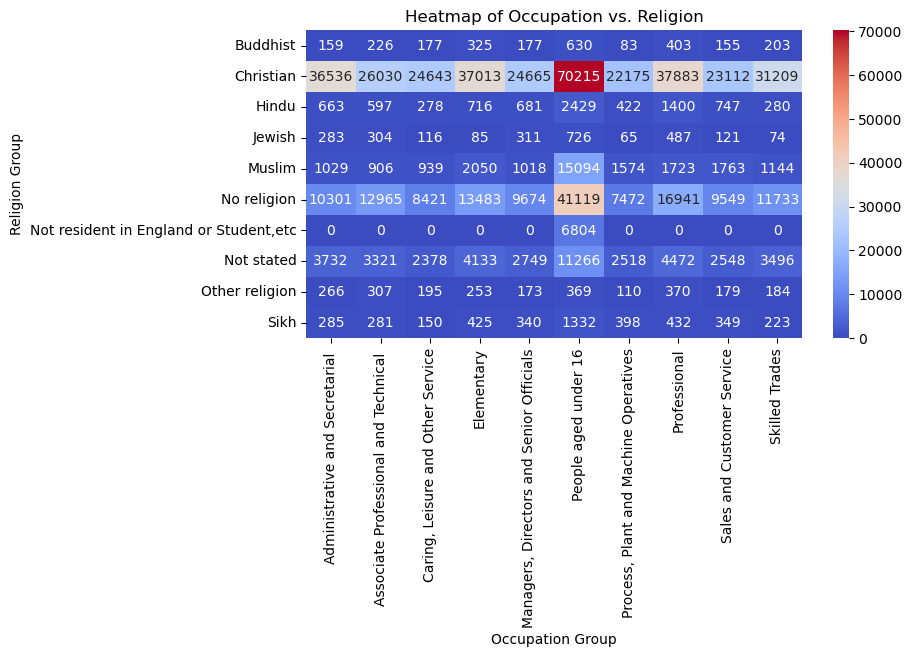

In [7]:
#Replacing numerical values with categorical values
religion_group = {
    1: 'No religion',
    2: 'Christian',
    3: 'Buddhist',
    4: 'Hindu',
    5: 'Jewish',
    6: 'Muslim',
    7: 'Sikh',
    8: 'Other religion',
    9: 'Not stated',
    -9: 'Not resident in England or Student,etc'
    
}

df['Religion Group'] = df['Religion'].replace(religion_group)
# Create a pivot table to aggregate data
heatmap_data = df.pivot_table(columns='Occupation Group', index='Religion Group', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True,cmap='coolwarm',  fmt='g')
plt.title('Heatmap of Occupation vs. Religion')
plt.show()

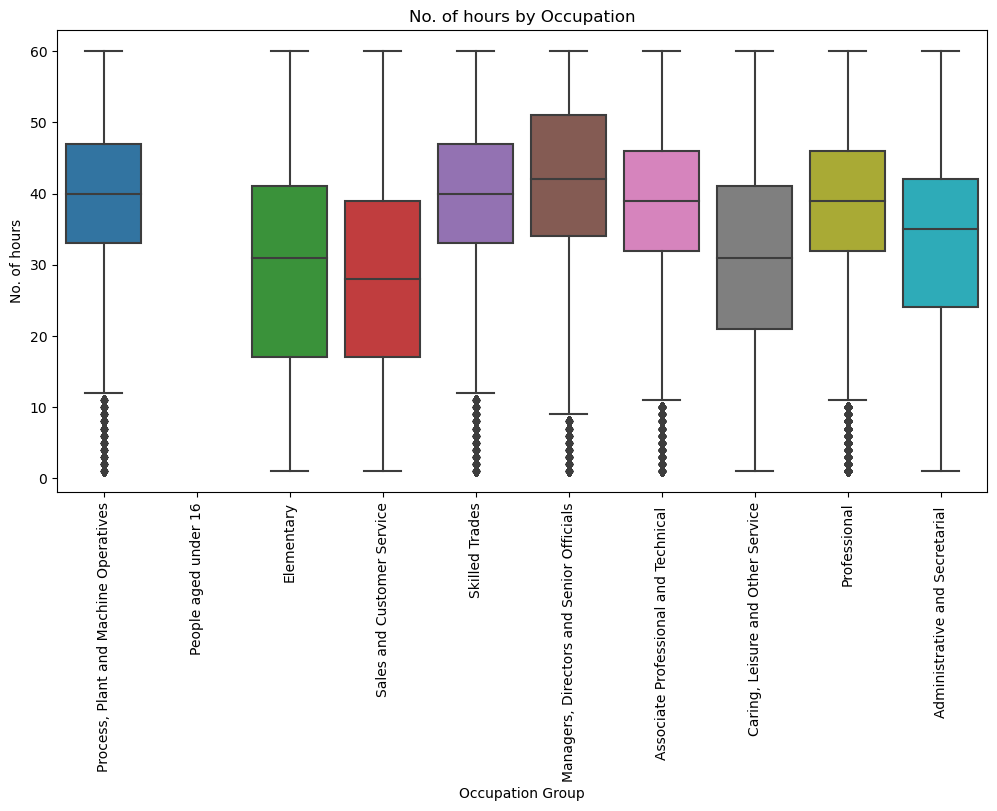

In [8]:
# Box Plot for Occupation Vs No. of Hours
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Occupation Group', y='No of hours')
plt.title('No. of hours by Occupation')
plt.xlabel('Occupation Group')
plt.xticks(rotation=90, va='top')
plt.ylabel('No. of hours')
plt.show()

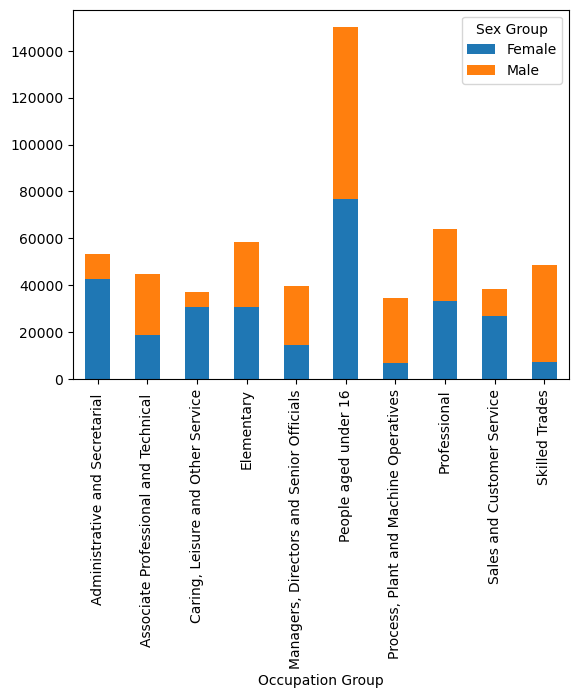

<Figure size 1200x600 with 0 Axes>

In [14]:
#Replacing numerical values with categorical values
industry_groups = {
    1: 'Agriculture, forestry and fishing',
    2: 'Mining and quarrying',
    3: 'Construction',
    4: 'Wholesale and retail trade',
    5: 'Accommodation and food service activities',
    6: 'Transport and storage',    
    7: 'Financial and insurance activities',
    8: 'Real estate activities;',
    9:'Public administration and defence',
    10:'Education',
    11:'Human health and social work activities',
    12:'Other community, social and personal service activities',
    -9:'People aged under 16'
}
df['Industry Group'] = df['Industry'].replace(industry_groups)

sex_group = {
    1: 'Male',
    2: 'Female'
}

df['Sex Group'] = df['Sex'].replace(sex_group)
# Plot the groupby bar graph 
group=df.groupby(['Occupation Group','Sex Group']).size().unstack()
group.plot(kind='bar',stacked=True)
plt.figure(figsize=(12,6))
plt.show()

